In [85]:
# importing basic python libraries , ml linaar regression and  some metrics 
# uploading datasets and printing the first five rows of the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
housing = pd.read_csv("C:/Users/IT676/Downloads/housing.csv")
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [86]:
# checking for datasets information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


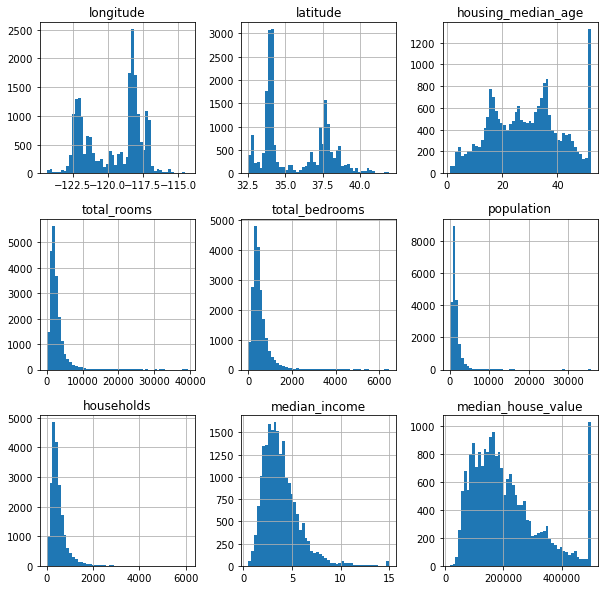

In [87]:
# Plotting the histogram of the features(columns)
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10, 10))
plt.show()

In [88]:
# defining parmeters and imputing null values by medain
y = housing['median_house_value']
x = housing.drop('median_house_value', axis = 1)
x['total_bedrooms'].fillna(x.total_bedrooms.median(), inplace = True )

In [89]:
# adding extra features and Splitting data 
x['rooms_per_house'] = x['total_rooms']/x['households']
x['bedrooms_per_room'] = x['total_bedrooms']/x['total_rooms']
x['population_per_houshold'] = x['population']/x['households']
x_train, x_test, y_train, y_test = train_test_split(x, y)


In [90]:
len(x_train)

15480

In [91]:
# creating Correlation matrix for training data
train = x_train.join(y_train)
corr_mat = train.corr()

In [92]:
# printing the correlation matrix for training data
corr_mat['median_house_value'].sort_values(ascending = False)

median_house_value         1.000000
median_income              0.688038
rooms_per_house            0.142828
total_rooms                0.132317
housing_median_age         0.102951
households                 0.064118
total_bedrooms             0.047654
population_per_houshold   -0.021639
population                -0.024684
longitude                 -0.054503
latitude                  -0.136682
bedrooms_per_room         -0.250013
Name: median_house_value, dtype: float64

In [93]:
# creating a new matrix for chossing features (coloumns )
housing_cols = train[['median_house_value','median_income','total_rooms','housing_median_age']]

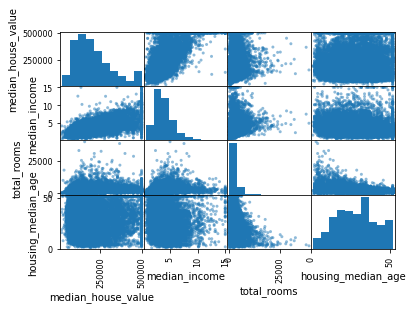

In [94]:
# Plotting the scatter plot for the matrix
scatter_matrix(housing_cols);

In [95]:
# Bulding ML ( linear regression) model
lm = LinearRegression()
x = train['median_income'].values.reshape(-1,1)
y = train['median_house_value']
lm.fit(x,y)
predict = lm.predict(x)

In [96]:
# printing predicted values
predict

array([252348.21525704, 154352.93723867, 264212.12119709, ...,
       196764.62494052, 360297.64049245, 134870.89092219])

In [97]:
print("Training Accuracy :", lm.score(x, y))


Training Accuracy : 0.47339685374682916


In [98]:
# printing mean squared error score for testing 
mse = mean_squared_error(predict, y)
np.sqrt(mse)

83324.89214385033

In [99]:
# comparing between True and predicted values and finding the difference between them
Pridiction_values_df = pd.DataFrame({'True Value':y,'Predictied value':predict, 'Difference':y-predict })
Pridiction_values_df[0:10]

,True Value,Predictied value,Difference
1912,206300.0,252348.215257,-46048.215257
7341,156000.0,154352.937239,1647.062761
11524,226100.0,264212.121197,-38112.121197
14105,92400.0,88815.199705,3584.800295
485,253600.0,112593.158423,141006.841577
3546,262100.0,308759.228390,-46659.228390
9792,387500.0,259686.369125,127813.630875
19483,100600.0,154545.166782,-53945.166782
12490,150000.0,135092.372787,14907.627213
9837,217100.0,166927.256708,50172.743292


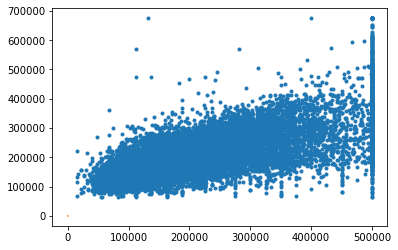

In [76]:
# plotting predicted values
plt.plot(y, predict,'.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 100,10)
y = x
plt.plot(x, y)
plt.show()